# DATA FETCH

In [38]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Reading the csv file for fetching data
main_data = pd.read_csv('tcc_ceds_music.csv')

In [40]:
# Printing top 5 rows of the dataset to get the better picture 
main_data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [41]:
# Printing all the columns of the dataset
main_data.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [42]:
# Selecting only columns with numeric values, other columns are discarded as they are of no use
desired_cols = ['genre', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']
df = pd.read_csv('tcc_ceds_music.csv', usecols = desired_cols)
print(df.head())

  genre  danceability  loudness  acousticness  instrumentalness   valence  \
0   pop      0.357739  0.454119      0.997992          0.901822  0.339448   
1   pop      0.331745  0.647540      0.954819          0.000002  0.325021   
2   pop      0.456298  0.585288      0.840361          0.000000  0.351814   
3   pop      0.686992  0.744404      0.083935          0.199393  0.775350   
4   pop      0.291671  0.646489      0.975904          0.000246  0.597073   

     energy  
0  0.137110  
1  0.263240  
2  0.139112  
3  0.743736  
4  0.394375  


<AxesSubplot: >

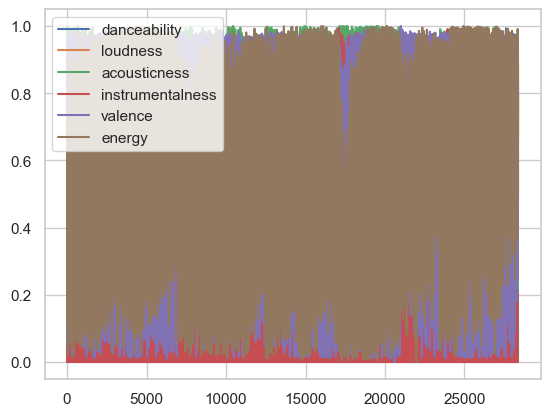

In [43]:
# Plotting them to get a rough idea of relation between them
df.plot()

# CORRELATION MATRIX AND HEATMAP

In [44]:
# Getting a correlation matrix, which eventually helps to know how two variables are linearly related with each other.
correlation_matrix = df.corr()
print(correlation_matrix)


                  danceability  loudness  acousticness  instrumentalness  \
danceability          1.000000  0.041380     -0.123475         -0.083308   
loudness              0.041380  1.000000     -0.539738         -0.132534   
acousticness         -0.123475 -0.539738      1.000000          0.007762   
instrumentalness     -0.083308 -0.132534      0.007762          1.000000   
valence               0.493627  0.133451     -0.172910         -0.077332   
energy                0.016277  0.773135     -0.720045          0.005606   

                   valence    energy  
danceability      0.493627  0.016277  
loudness          0.133451  0.773135  
acousticness     -0.172910 -0.720045  
instrumentalness -0.077332  0.005606  
valence           1.000000  0.280487  
energy            0.280487  1.000000  


/var/folders/md/bwhknjsx4t3fc85j8f04l_w40000gn/T/ipykernel_42383/1851860478.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


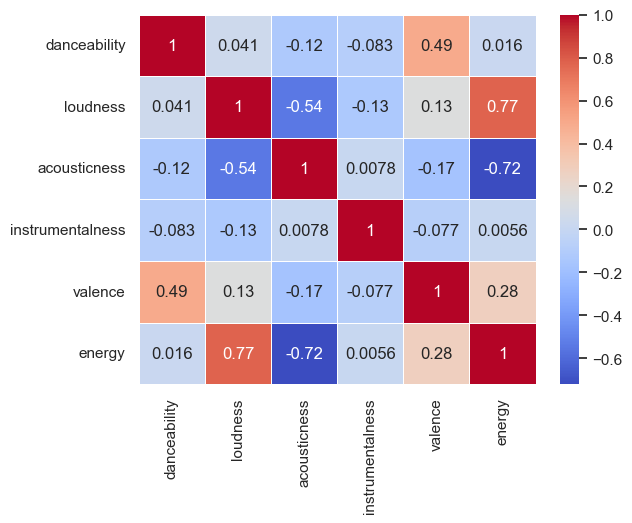

In [45]:
# Representing the above correlation with the help of a Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = .5)
plt.show()

# HISTOGRAM PLOTS

## Histograms of pairs

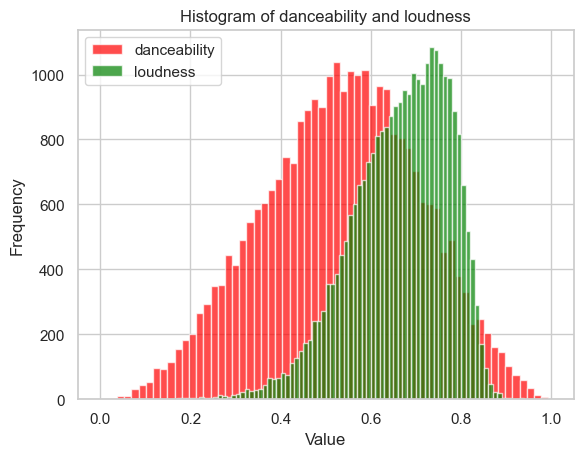

In [46]:
# Creating Histogram plots to show relation between pairs of numeric columns as mentioned above
plt.hist(df['danceability'], bins = 'auto', alpha = 0.7, color = 'red', label = 'danceability')
plt.hist(df['loudness'], bins = 'auto', alpha = 0.7, color = 'green', label = 'loudness')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of danceability and loudness')
plt.legend()
plt.show()

In [47]:
def multiple_hists(dataframe, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=num_columns, figsize=(15, 15))
    
    for i in range(num_columns):
        for j in range(num_columns):
            if i != j:
                a = dataframe[columns[i]]
                b = dataframe[columns[j]]
                axes[i, j].hist2d(a, b, bins = (50,50), cmap = 'Blues', alpha = 0.7)
                axes[i, j].set_title(f'{columns[i]} vs {columns[j]}')
                axes[i, j].set_xlabel(columns[i])
                axes[i, j].set_ylabel(columns[j])
                
    plt.tight_layout()
    plt.show()

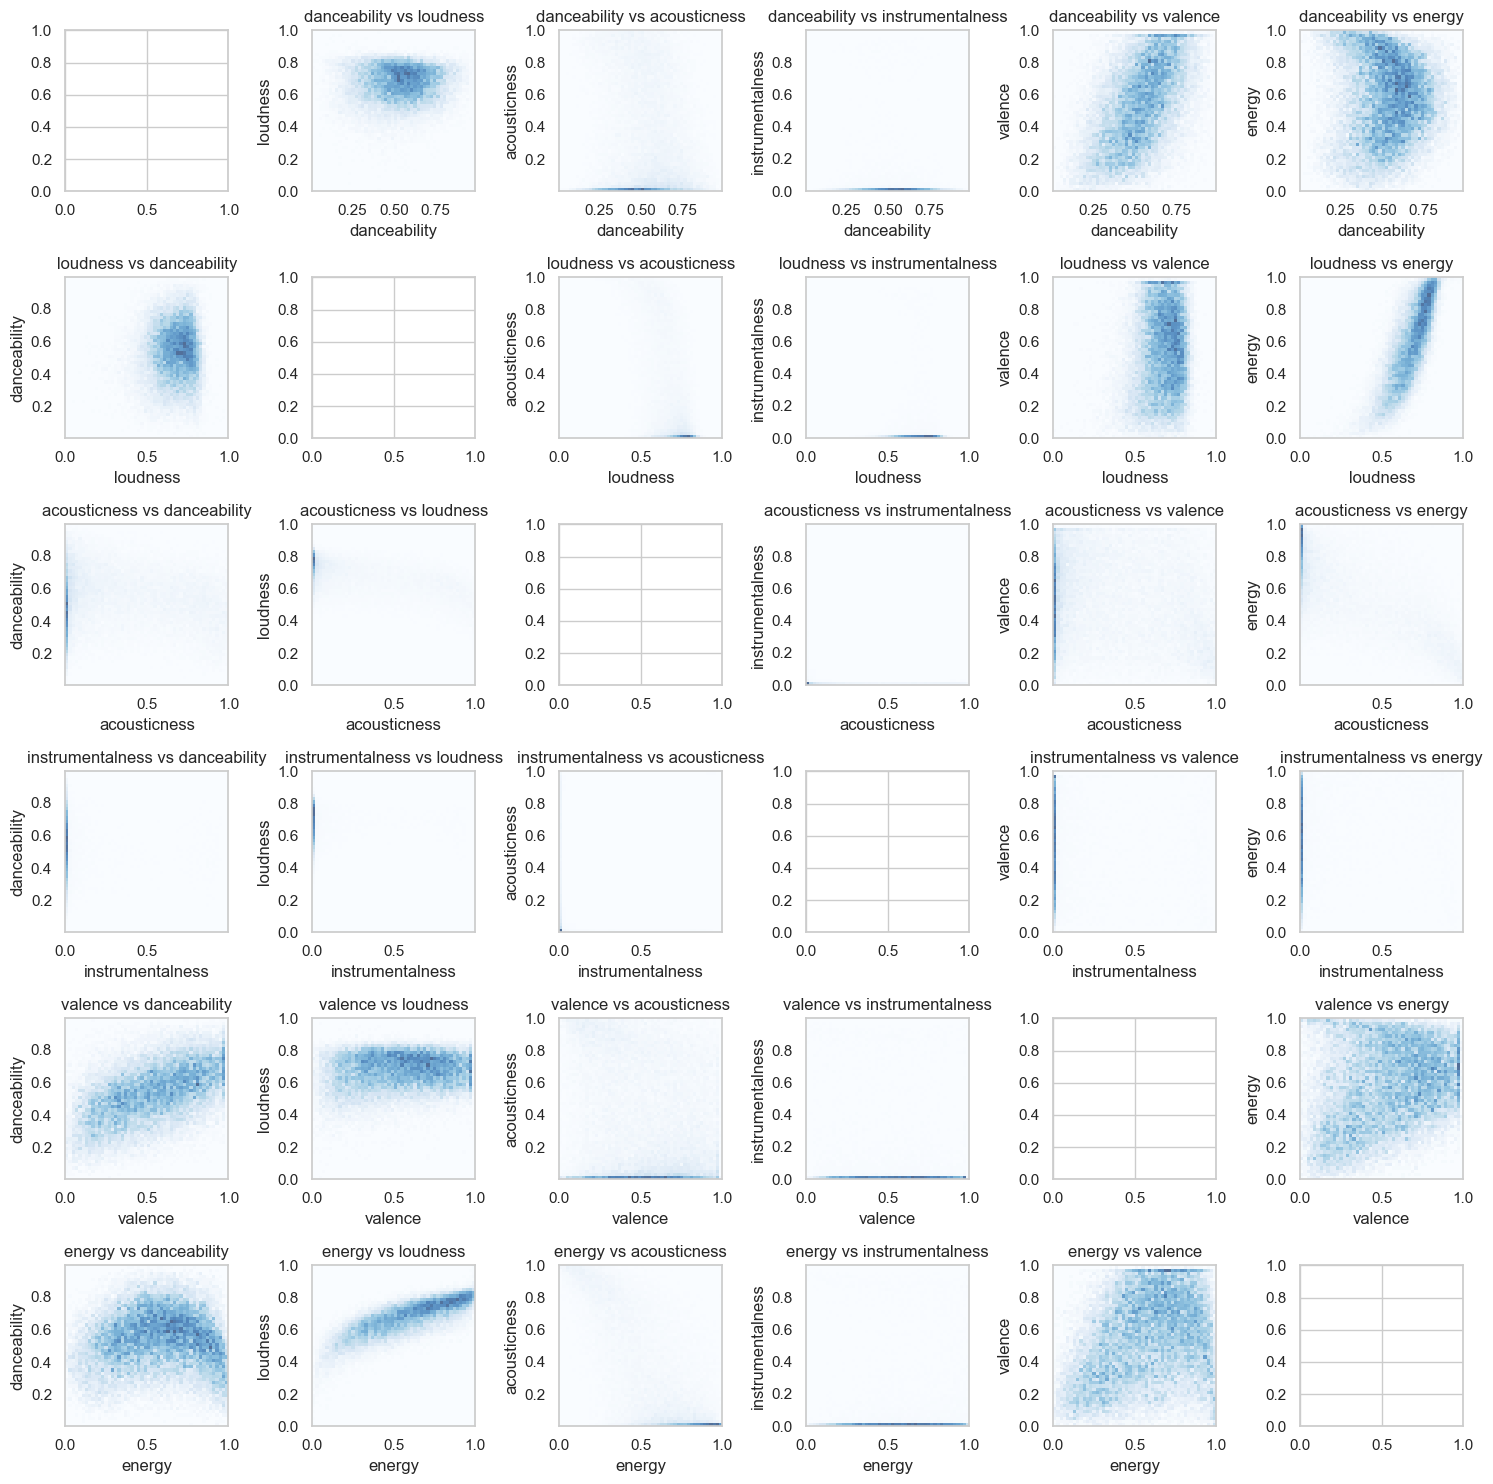

In [48]:
columns_list = ['danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']
multiple_hists(df, columns_list)

In [49]:
def multiple_hists(dataframe, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=num_columns, figsize=(20, 20))
# Running a loop to get all the pairs of the available columns in the dataset   
    for i in range(num_columns):
        for j in range(num_columns):
# Checking for the conditions where i and j are not equal to get different parameters each time
            if i != j:
                a = dataframe[columns[i]]
                b = dataframe[columns[j]]
                axes[i, j].hist2d(a, b, bins = (50,50), cmap = 'Reds', alpha = 0.7)
                axes[i, j].set_title(f'{columns[i]} vs {columns[j]}')
                axes[i, j].set_xlabel(columns[i])
                axes[i, j].set_ylabel(columns[j])
# Density plot along x-axis
                sns.kdeplot(a, ax = axes[i,j], color = 'Blue', fill = True, legend = False)
    
# Density plot along y-axis
                sns.kdeplot(b, ax = axes[i, j].twinx(), color = 'Green', fill = True, legend = False)
#             else:
#                 return print('No output')
                
    plt.tight_layout()
    plt.show()

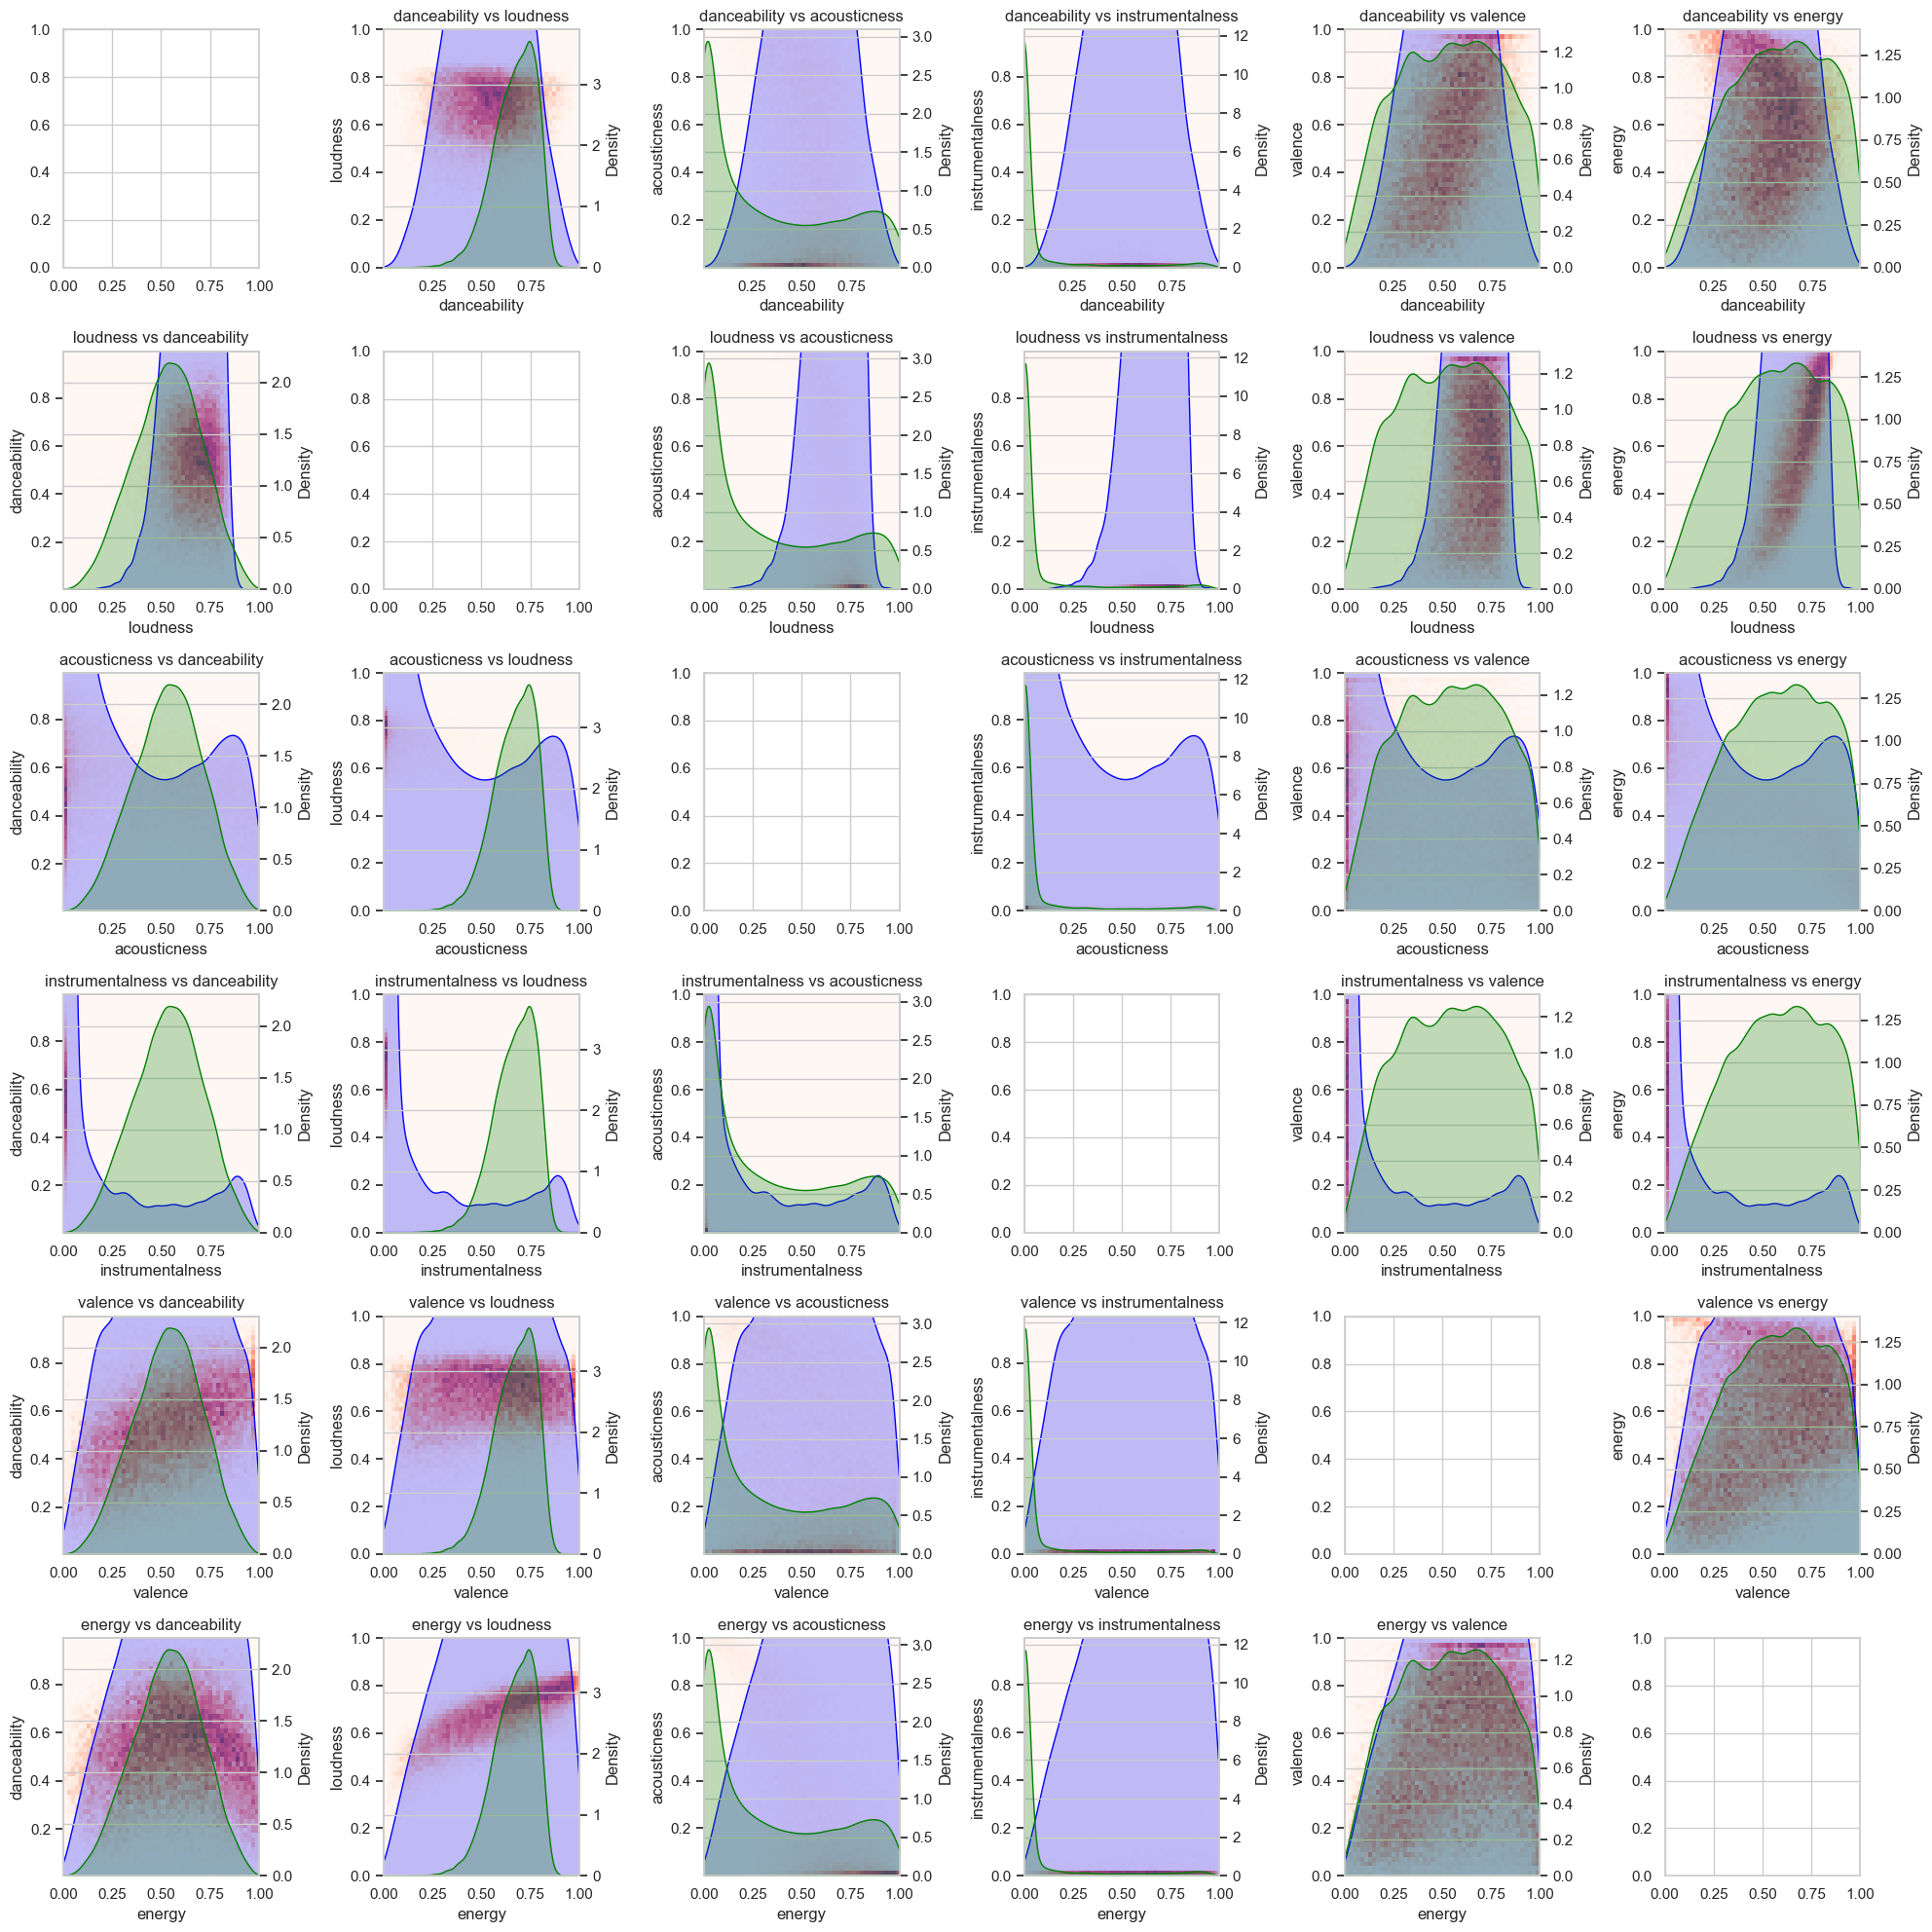

In [50]:
columns_list = ['danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']
multiple_hists(df, columns_list)

# BOXPLOTS

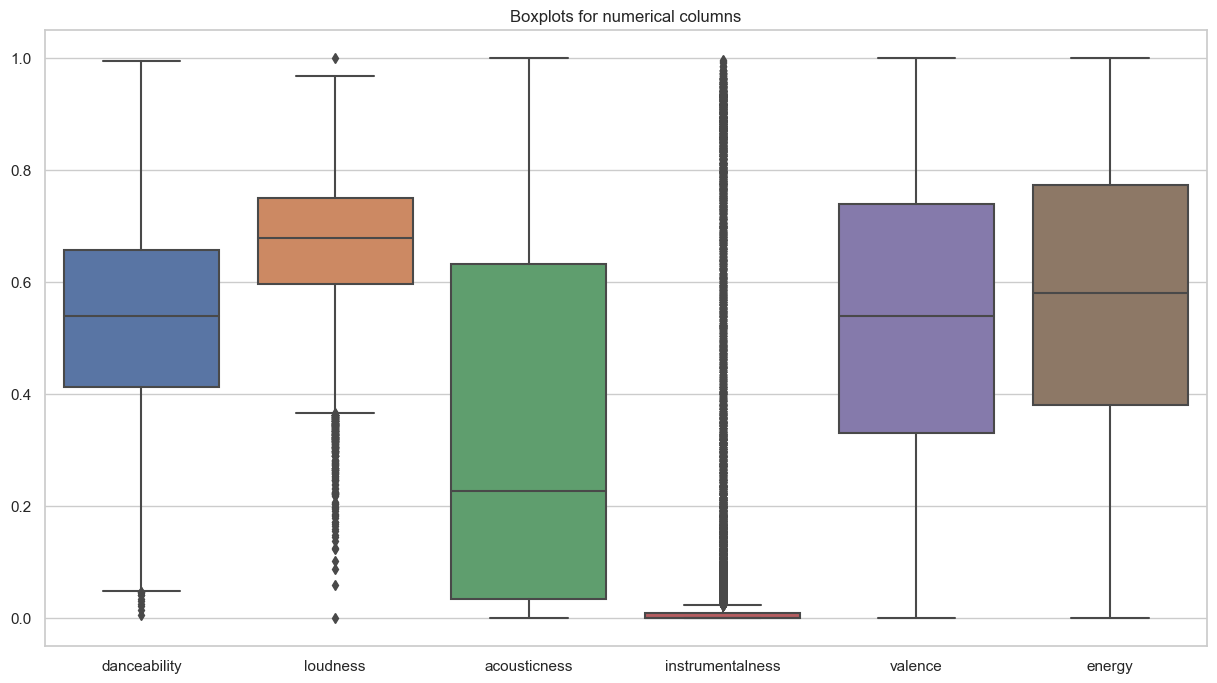

In [51]:
# Boxplots give a better visualisation for comparison between numeric columns.
# We have to look for min values, max values and Inter Quartile Range and also Outliers.
sns.set(style = 'whitegrid')

plt.figure(figsize=(15, 8))
sns.boxplot(data = df[columns_list])
plt.title('Boxplots for numerical columns')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

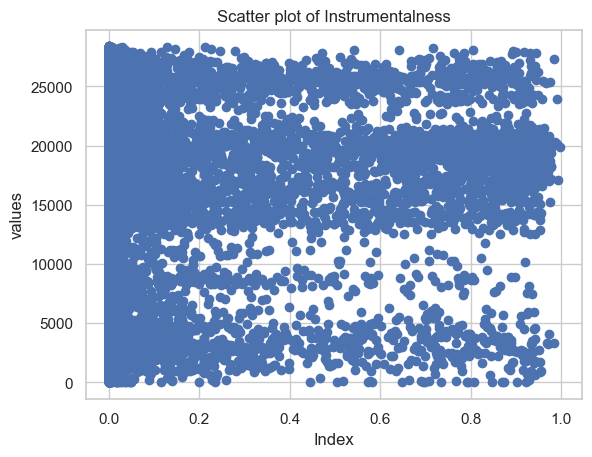

In [52]:
# Analysing scatter plot of Instrumentalness
plt.scatter(df['instrumentalness'], range(len(df['instrumentalness'])))
df.transpose()
plt.title('Scatter plot of Instrumentalness')
plt.xlabel('Index')
plt.ylabel('values')
plt.show


In [55]:
print(df.dtypes)
print(df['instrumentalness'].head())

genre                object
danceability        float64
loudness            float64
acousticness        float64
instrumentalness    float64
valence             float64
energy              float64
dtype: object
0    0.901822
1    0.000002
2    0.000000
3    0.199393
4    0.000246
Name: instrumentalness, dtype: float64
